In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [56]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [57]:
customers_head = customers.head()
products_head = products.head()
transactions_head = transactions.head()

print("Customers CSV File")
display(customers_head)

print("Products CSV File")
display(products_head)

print("Transactions CSV File")
display(transactions_head)

Customers CSV File


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Products CSV File


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


Transactions CSV File


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [58]:
# 1. Determine the total timeline of transactions
earliest_transaction = transactions['TransactionDate'].min()
latest_transaction = transactions['TransactionDate'].max()
print(f"Total Timeline: {earliest_transaction} to {latest_transaction}")

Total Timeline: 2023-12-30 15:29:12 to 2024-12-28 11:00:00


In [59]:
# 2. Identify valid transactions
transactions['Valid'] = (transactions['Quantity'] > 0) & (transactions['TotalValue'] == transactions['Quantity'] * transactions['Price'])
valid_transactions = transactions[transactions['Valid']]
invalid_transactions = transactions[~transactions['Valid']]
print(f"Valid Transactions: {len(valid_transactions)}")
print(f"Invalid Transactions: {len(invalid_transactions)}")

Valid Transactions: 912
Invalid Transactions: 88


In [60]:
# 3. Analyze top categories and products for each month
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_category_sales = transactions.merge(products, on='ProductID').groupby(['Month', 'Category'])['Quantity'].sum().reset_index()
monthly_top_categories = monthly_category_sales.loc[monthly_category_sales.groupby('Month')['Quantity'].idxmax()]
monthly_product_sales = transactions.groupby(['Month', 'ProductID'])['Quantity'].sum().reset_index()
monthly_top_products = monthly_product_sales.loc[monthly_product_sales.groupby('Month')['Quantity'].idxmax()]
print("Top Categories per Month:")
print(monthly_top_categories)
print("Top Products per Month:")
print(monthly_top_products)

Top Categories per Month:
      Month     Category  Quantity
1   2023-12  Electronics         6
3   2024-01        Books        76
7   2024-02        Books        65
14  2024-03   Home Decor        70
18  2024-04   Home Decor        55
19  2024-05        Books        72
23  2024-06        Books        61
29  2024-07  Electronics        70
31  2024-08        Books        70
38  2024-09   Home Decor        71
41  2024-10  Electronics        49
45  2024-11  Electronics        48
50  2024-12   Home Decor        59
Top Products per Month:
       Month ProductID  Quantity
0    2023-12      P020         4
48   2024-01      P063        11
86   2024-02      P028        10
151  2024-03      P054        11
196  2024-04      P029        15
296  2024-05      P097        11
318  2024-06      P040        14
394  2024-07      P078        13
443  2024-08      P054        12
490  2024-09      P029        12
588  2024-10      P096         9
610  2024-11      P054         7
652  2024-12      P035        1

   ProductID     Category  Quantity
28      P029  Electronics  5.125218
77      P078   Home Decor  4.457204
34      P035     Clothing  4.226898
39      P040        Books  4.070802
53      P054        Books  3.690399
96      P097        Books  3.544949
62      P063        Books  3.488075
10      P011   Home Decor  3.430258
27      P028   Home Decor  3.370036
52      P053   Home Decor  3.258688


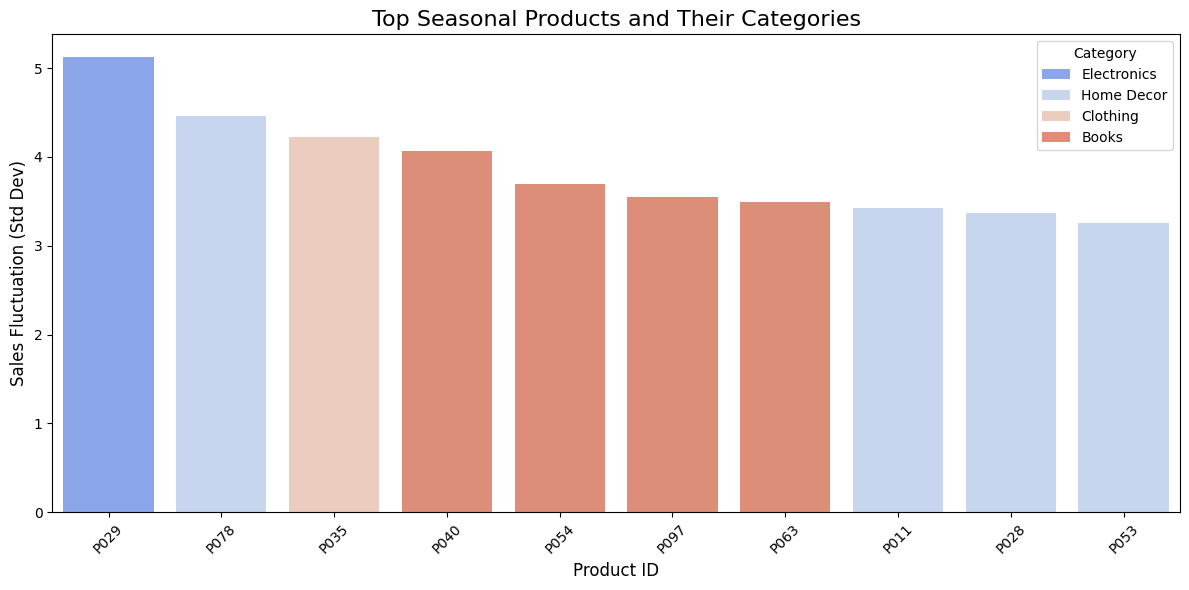

In [61]:
# 4. Identify seasonal products and categories
seasonal_products = transactions.merge(products, on='ProductID').groupby(['ProductID', 'Category', 'Month'])['Quantity'].sum().reset_index()
seasonal_products = seasonal_products.groupby(['ProductID', 'Category'])['Quantity'].std().reset_index().sort_values(by='Quantity', ascending=False).head(10)
print(seasonal_products)

# Plot seasonal products
plt.figure(figsize=(12, 6))
sns.barplot(data=seasonal_products, x='ProductID', y='Quantity', hue='Category', palette='coolwarm')
plt.title("Top Seasonal Products and Their Categories", fontsize=16)
plt.xlabel("Product ID", fontsize=12)
plt.ylabel("Sales Fluctuation (Std Dev)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

Region with Highest Revenue:
          Region  TotalValue
3  South America   219352.56
1         Europe   166254.63
2  North America   152313.40
0           Asia   152074.97
Monthly Trends by Region:
        Month         Region  TotalValue
0  2023-12-01           Asia     1585.36
1  2023-12-01         Europe     1272.72
2  2023-12-01  North America      911.44
3  2024-01-01           Asia    19429.97
4  2024-01-01         Europe    19287.27
5  2024-01-01  North America    12277.27
6  2024-01-01  South America    15381.88
7  2024-02-01           Asia     8960.31
8  2024-02-01         Europe    10442.93
9  2024-02-01  North America    13286.83
10 2024-02-01  South America    18769.20
11 2024-03-01           Asia     9875.56
12 2024-03-01         Europe    12553.90
13 2024-03-01  North America    14974.31
14 2024-03-01  South America    10424.96
15 2024-04-01           Asia    10371.77
16 2024-04-01         Europe    11775.14
17 2024-04-01  North America    22969.02
18 2024-04-01  South 

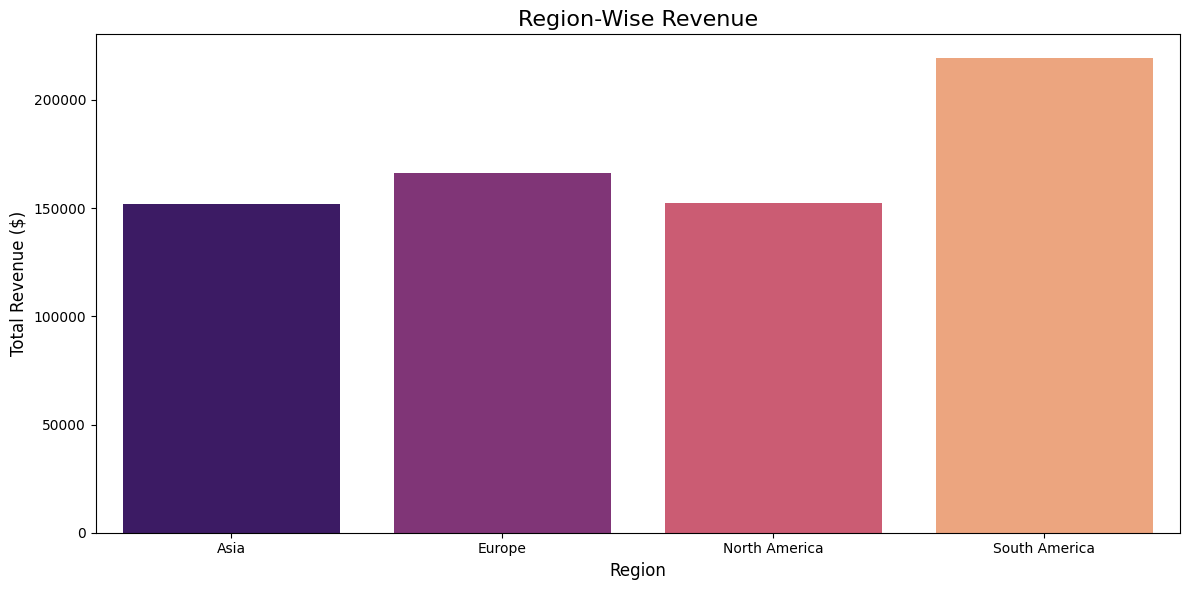

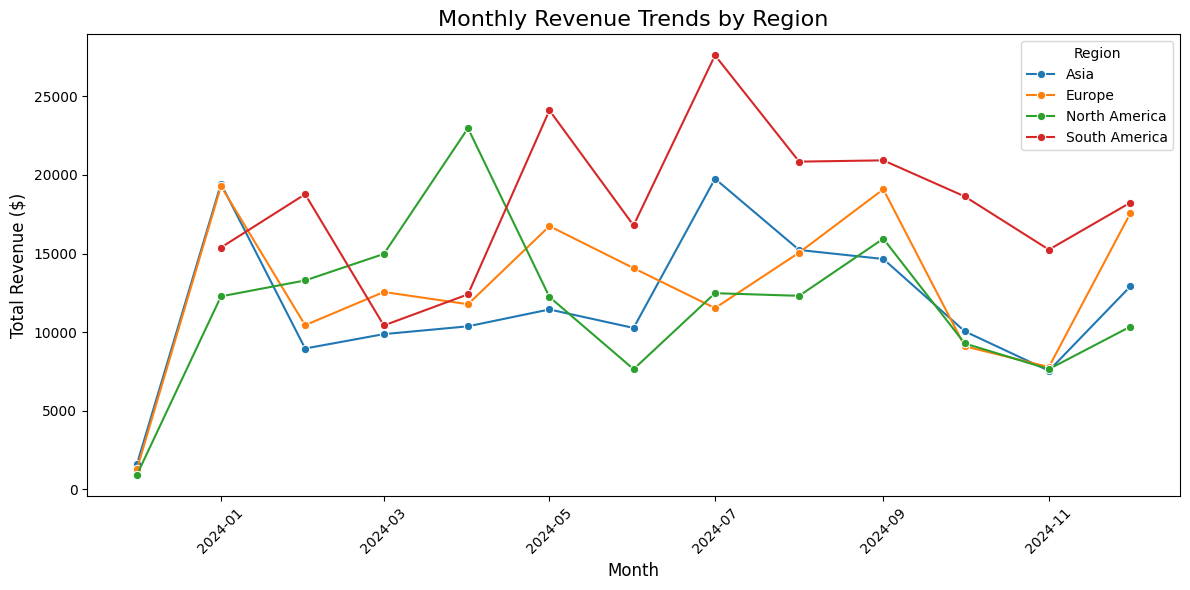

In [62]:
# 5. Region generating the highest revenue & trends
region_revenue = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum().reset_index()
monthly_region_revenue = transactions.merge(customers, on='CustomerID').groupby(['Month', 'Region'])['TotalValue'].sum().reset_index()

# Convert Month column to datetime
monthly_region_revenue['Month'] = monthly_region_revenue['Month'].dt.to_timestamp()

print("Region with Highest Revenue:")
print(region_revenue.sort_values(by='TotalValue', ascending=False))
print("Monthly Trends by Region:")
print(monthly_region_revenue)

# Plot region-wise revenue
plt.figure(figsize=(12, 6))
sns.barplot(data=region_revenue, x='Region', y='TotalValue', palette='magma')
plt.title("Region-Wise Revenue", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.tight_layout()
plt.show()

# Plot monthly revenue trends by region
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_region_revenue, x='Month', y='TotalValue', hue='Region', marker='o', palette='tab10')
plt.title("Monthly Revenue Trends by Region", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

Highest Spending Customers:
    CustomerID  TotalValue
140      C0141    10673.87
53       C0054     8040.39
64       C0065     7663.70
155      C0156     7634.45
81       C0082     7572.91
186      C0188     7111.32
58       C0059     7073.28
27       C0028     6819.57
98       C0099     6715.72
164      C0165     6708.10


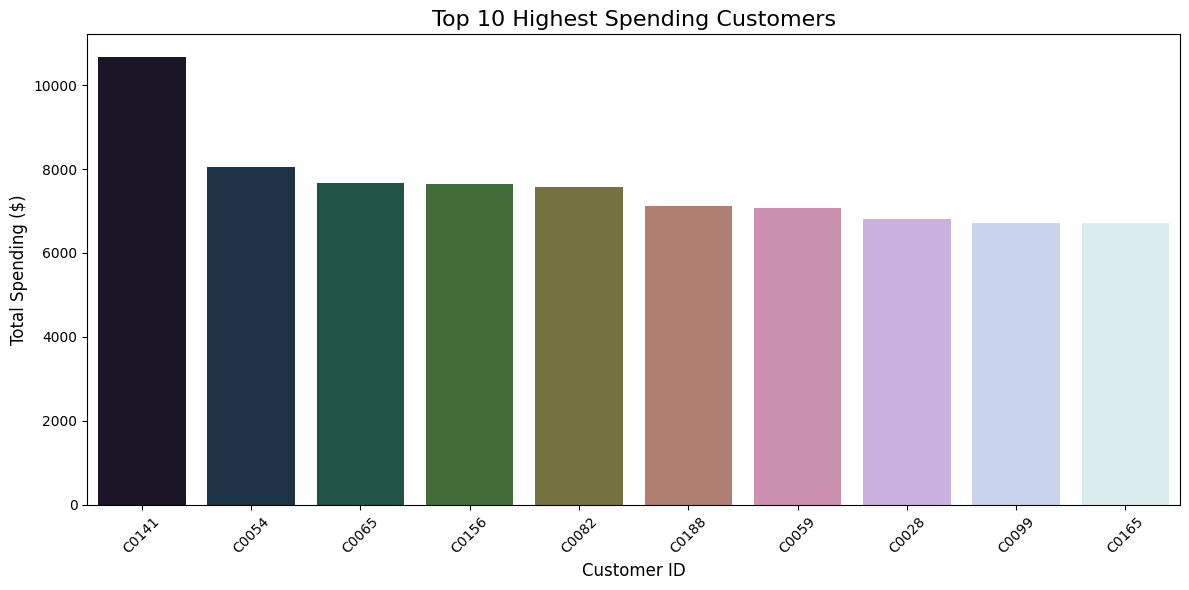

In [63]:
# 6. Highest spending customers
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
top_spending_customers = customer_spending.sort_values(by='TotalValue', ascending=False).head(10)
print("Highest Spending Customers:")
print(top_spending_customers)
# Plot highest spending customers
plt.figure(figsize=(12, 6))
sns.barplot(data=top_spending_customers, x='CustomerID', y='TotalValue', palette='cubehelix')
plt.title("Top 10 Highest Spending Customers", fontsize=16)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Total Spending ($)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
# merge products with transactions with Customers 
df = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')
df.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Valid,Month,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,True,2024-08,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,True,2024-05,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,True,2024-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,True,2024-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,True,2024-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15
